In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dataset = pd.read_csv('kc_house_data.csv')
# On ne garde que les colonnes numériques
subdataset = dataset.select_dtypes(include = ['int64',  'float64'])
subdataset.info()
subdataset = subdataset[:10000] # On ne garde que les 10 000 premières lignes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 non-null  float64
 17  long           21613 non-null  float64
 18  sqft_l

<AxesSubplot:>

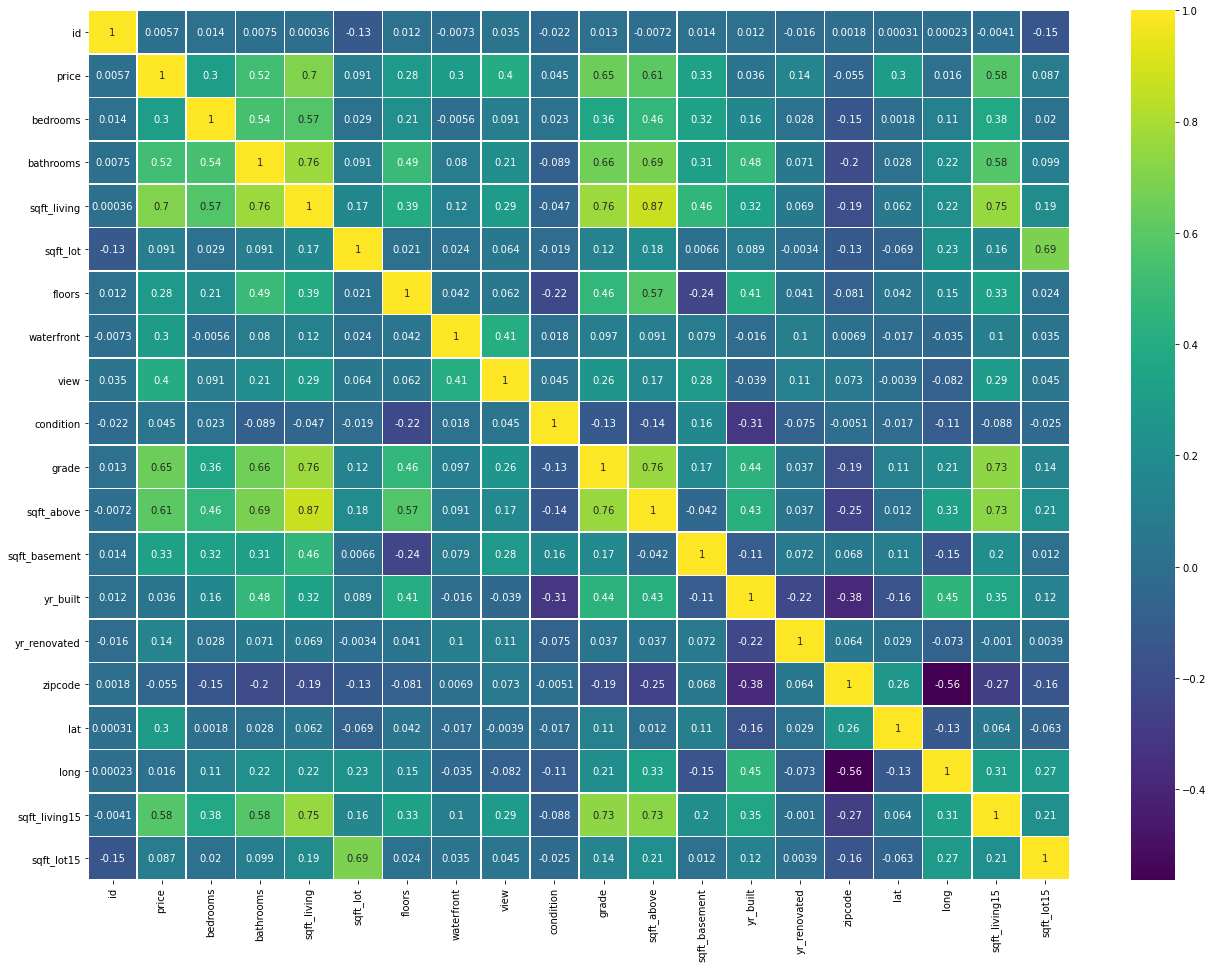

In [3]:
#Matrice de corrélation
plt.figure(figsize = (22,16))
corrMatrix = subdataset.corr()
sns.heatmap(corrMatrix, 
        xticklabels=corrMatrix,
        yticklabels=corrMatrix,
        linewidths=.5,
        annot=True,
        cmap='viridis')
# On prend la variable la plus corrélée au prix, <=>  la taille du logement (sqft_living)
# avec un coefficient de corrélation de Pearson de 0.7

In [19]:
columns = ['sqft_living', 'grade', 'bedrooms']
X = subdataset[columns] #  passe les données en tableaux numpy
X = (X - np.mean(X))/np.std(X)  # Standardisation des données
y = subdataset['price'].values

X = np.reshape(X, (X.shape[0], len(columns)))
print(X)
y = np.reshape(y, (y.shape[0], 1))

X = np.hstack((X, np.ones((X.shape[0],1)))) # On ajoute la colonne des biais
theta =  np.random.rand(X.shape[1],1) # On  créer notre vecteur théta

      sqft_living     grade  bedrooms
0       -0.958192 -0.509865 -0.394762
1        0.567363 -0.509865 -0.394762
2       -1.408176 -1.367645 -1.486472
3       -0.102125 -0.509865  0.696948
4       -0.409432  0.347916 -0.394762
...           ...       ...       ...
9995    -1.133796 -0.509865 -1.486472
9996    -0.387481 -0.509865 -0.394762
9997    -0.552109 -0.509865  0.696948
9998    -0.409432  0.347916 -0.394762
9999    -0.409432 -0.509865 -0.394762

[10000 rows x 3 columns]


In [28]:
def hypothesis(X, theta):
    return np.dot(X,theta)

In [29]:
# On définit la fonction de coût J(theta) qui correspond à la MSE
def J(X, y, theta):
    m = y.shape[0]
    return (1/(2*m)) * sum((X.dot(theta) - y)**2) 

In [30]:
# La dérivée  de J
def grad(X, y, theta):
    m = y.shape[0]
    return (1/m) * X.T.dot(X.dot(theta) - y)

In [31]:
# L'algorithme de descente de gradient avec por défault, alpha = 0.05 et le nombre d'itérations à 2000
def grad_desc(X, y, theta, alpha = 0.05, nb_iter = 2000):
    lossList = []
    for i in range(nb_iter):
        lossList.append(J(X, y, theta))
        theta = theta - alpha * grad(X, y, theta)
    return theta, lossList

In [32]:
theta, lossList = grad_desc(X, y, theta, alpha =  0.05,  nb_iter = 2000)

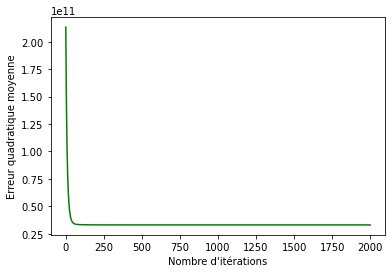

In [33]:
# Représentation graphique de l'évolution des résultats de la  fonction coût, elle semble converger
plt.plot(range(2000), lossList, c = 'green')
plt.xlabel('Nombre d\'itérations')
plt.ylabel('Erreur quadratique moyenne')
plt.show()

In [35]:
lossList[len(lossList)-1]
# Le coût minimum (dernier obtenu) est très élevé, notre modèle est peu efficace

array([3.30013588e+10])

In [36]:
# Calcul du coefficient de détermination (R²)
u = ((y - predictions)**2).sum()
v = ((y - y.mean())**2).sum()
R =  1 - u/v
print('R² : '+str(R))
# Permet de prédire  53.5 % des points, le modèle est mauvais pour nos données

R² : 0.5350791960840512


In [37]:
#Equation normale :
def equation_Normale(X, y):
    return np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))
theta2 =  equation_Normale(X, y)
print(theta - theta2)

[[-3.31144896e-04]
 [ 2.60154920e-04]
 [ 1.19216165e-04]
 [-1.16415322e-09]]


In [103]:
# Régression polynomiale

X_polynomiale = subdataset['sqft_living'].values**2
X_polynomiale = X_polynomiale.reshape((X_polynomiale.shape[0], 1))

X_temp = subdataset['sqft_living'].values.reshape((subdataset['sqft_living'].values.shape[0], 1)) #
X_polynomiale = np.hstack((X_polynomiale, X_temp))

X_polynomiale = np.hstack((X_polynomiale, np.ones((X_polynomiale.shape[0],1)))) # on ajoute le biais
theta_polynomiale = np.random.rand(X_polynomiale.shape[1],1)

In [105]:
theta_polynomiale = equation_Normale(X_polynomiale, y)

Text(0.5, 1.0, 'Modèle de régression linéaire univarié')

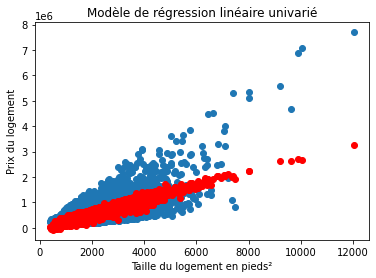

In [110]:
# Affichage du modèle
predictions_poly = hypothesis(X_polynomiale, theta_polynomiale)
plt.scatter(subdataset['sqft_living'], y)
plt.scatter(subdataset['sqft_living'], predictions, c='r')
plt.xlabel('Taille du logement en pieds²')
plt.ylabel('Prix du logement')
plt.title('Modèle de régression linéaire univarié')

In [107]:
predictions_poly

array([[346550.49290537],
       [610187.43030561],
       [310029.62623349],
       ...,
       [395636.53102001],
       [416515.45045339],
       [416515.45045339]])